#### IMPORTATION OF DATA

In [1]:
# we need to bring in the libraries to assist
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv") #to read the train dataset 
df.head(5) # to show the first 5 rows

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
credit_score_counts = df['Credit_Score'].value_counts()
credit_score_counts


Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [4]:
# to get to know the information about the 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.shape

(100000, 28)

#### DATA CLEANING AND PRE-PROCESSING

In [6]:
# some of the variables needs to be drop from the dataset
new_df = df.drop(['ID', 'Customer_ID', 'Month','Name','Monthly_Inhand_Salary','SSN','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly'], axis = 'columns') # these are some irrelevant features and need to be dropped
new_df

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,-1,NaN,809.98,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,6,NaN,809.98,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,23,7,502.38,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,18,7,502.38,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,27,6,502.38,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,Poor
99998,25,Mechanic,39628.99,20,NaN,502.38,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,Standard


In [7]:
# this is used to count the number of missinig items during the cleaning of the data
new_df.isnull().sum() 

Age                          0
Occupation                   0
Annual_Income                0
Delay_from_due_date          0
Num_of_Delayed_Payment    7002
Outstanding_Debt             0
Credit_History_Age        9030
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Payment_Behaviour            0
Monthly_Balance           1200
Credit_Score                 0
dtype: int64

In [8]:
#this drops the rows that contains "NaN" and also ensures no change is made to the original dataset
new_dataset = new_df.dropna().copy()
new_dataset

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
5,23,Scientist,19114.12,8,4,809.98,22 Years and 6 Months,No,49.574949,!@9#%8,340.4792117872438,Good
6,23,Scientist,19114.12,3,8_,809.98,22 Years and 7 Months,No,49.574949,Low_spent_Small_value_payments,244.5653167062043,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25,Mechanic,39628.99,20,6,502.38,31 Years and 5 Months,No,35.104023,High_spent_Medium_value_payments,410.256158,Poor
99995,25,Mechanic,39628.99,23,7,502.38,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,18,7,502.38,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,27,6,502.38,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,Poor


In [9]:
# Iterate over each column in new_df
for column in new_dataset.columns:
    
    

    print(f"Unique values in {column}:")
    print(new_dataset[column].unique())

# Check for missing values in new_df
missing_values = new_dataset.isnull().sum()
print("\nMissing values in each column:")

#this shows the content of the dataframe
print(missing_values)

Unique values in Age:
['23' '-500' '28_' ... '4808_' '2263' '1342']
Unique values in Occupation:
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Unique values in Annual_Income:
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
Unique values in Delay_from_due_date:
[ 3  5  8  7 13 10  0  4  1  9 11 -1 30 31 34 27 14  2 -2 16 17 15 23 22
 12 18 19 51 53 26 48 43 52 28 25 20 49 61 29 50 58 45  6 55 56 59 57 54
 62 67 36 41 21 24 65 33 32 39 47 46 60 64 35 44 38 -3 63 42 40 37 -5 -4
 66]
Unique values in Num_of_Delayed_Payment:
['7' '4' '8_' '1' '-1' '3_' '0' '8' '6' '5' '3' '9' '12' '15' '17' '2'
 '2_' '14' '11' '20' '22' '10' '13' '13_' '14_' '16' '12_' '18' '19' '23'
 '24' '21' '3318' '3083' '22_' '1338' '4_' '26' '11_' '3104' '25' '10_'
 '183_' '9_' '1106' '834' '19_' '24_' '23_' '2672' '20_' '2008' '-3' '538'
 '6_' '1_' '16_

In [10]:
# we need to drop the incorrect datsets with "-"
# remember "new_dataset = new_df.dropna().copy()""

new_dataset = new_dataset[~new_dataset['Occupation'].str.contains('_______')]
new_dataset = new_dataset[~new_dataset['Payment_Behaviour'].str.contains('!@9#%8')]


In [11]:
sym = "\\`*_{}[]()>#@+!$:;"
column_integer = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income']
column_string = ['Occupation','Credit_History_Age','Payment_of_Min_Amount','Credit_Score']
for i in column_integer:
 for c in sym:
    new_dataset[i] = new_dataset[i].astype(str).str.replace(c,'')
for i in column_string:
  for c in sym:
    new_dataset[i] = new_dataset[i].replace(c,'')
new_dataset

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.57494921489417,High_spent_Small_value_payments,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.57494921489417,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.57494921489417,Low_spent_Small_value_payments,223.45130972736786,Good
6,23,Scientist,19114.12,3,8,809.98,22 Years and 7 Months,No,49.57494921489417,Low_spent_Small_value_payments,244.5653167062043,Good
9,28,Teacher,34847.84,7,1,605.03,26 Years and 8 Months,No,18.816214573128885,High_spent_Large_value_payments,484.5912142650067,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,29,Architect,20002.88,33,25,3571.7,6 Years and 3 Months,Yes,60.964772373422434,High_spent_Large_value_payments,337.3629882027182,Standard
99994,25,Mechanic,39628.99,20,6,502.38,31 Years and 5 Months,No,35.10402261040746,High_spent_Medium_value_payments,410.2561579776419,Poor
99995,25,Mechanic,39628.99,23,7,502.38,31 Years and 6 Months,No,35.10402261040746,High_spent_Large_value_payments,479.86622816574095,Poor
99996,25,Mechanic,39628.99,18,7,502.38,31 Years and 7 Months,No,35.10402261040746,High_spent_Medium_value_payments,496.651610435322,Poor


In [12]:
#transform the credit age to a float
new_dataset['Credit_History_Age'] = new_dataset['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
new_dataset['Credit_History_Age'] = new_dataset['Credit_History_Age'].astype(str).str.replace('Months','')

new_dataset.head(10)

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22.1,No,49.57494921489417,High_spent_Small_value_payments,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22.3,No,49.57494921489417,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22.4,No,49.57494921489417,Low_spent_Small_value_payments,223.45130972736786,Good
6,23,Scientist,19114.12,3,8,809.98,22.7,No,49.57494921489417,Low_spent_Small_value_payments,244.5653167062043,Good
9,28,Teacher,34847.84,7,1,605.03,26.8,No,18.816214573128885,High_spent_Large_value_payments,484.5912142650067,Good
10,28,Teacher,34847.84,3,-1,605.03,26.9,No,18.816214573128885,High_spent_Large_value_payments,466.46647639764313,Standard
11,28,Teacher,34847.84,3,3,605.03,26.10,No,18.816214573128885,Low_spent_Medium_value_payments,465.6762241330048,Good
12,28,Teacher,34847.84,3,1,605.03,26.11,No,18.816214573128885,Low_spent_Small_value_payments,444.8670318506144,Good
13,28,Teacher,34847.84,3,0,605.03,27.0,No,18.816214573128885,High_spent_Large_value_payments,481.505261949182,Good
14,28,Teacher,34847.84,3,4,605.03,27.1,NM,18.816214573128885,High_spent_Medium_value_payments,464.8806778859809,Good


In [13]:
#transform the credit age to a float
new_dataset['Age'] = new_dataset['Age'].astype(int)
new_dataset = new_dataset[(new_dataset['Age'] >=0) & (new_dataset['Age'] <= 150)]

new_dataset.head(50)

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22.1,No,49.57494921489417,High_spent_Small_value_payments,312.49408867943663,Good
3,23,Scientist,19114.12,5,4,809.98,22.4,No,49.57494921489417,Low_spent_Small_value_payments,223.45130972736786,Good
6,23,Scientist,19114.12,3,8,809.98,22.7,No,49.57494921489417,Low_spent_Small_value_payments,244.5653167062043,Good
9,28,Teacher,34847.84,7,1,605.03,26.8,No,18.816214573128885,High_spent_Large_value_payments,484.5912142650067,Good
10,28,Teacher,34847.84,3,-1,605.03,26.9,No,18.816214573128885,High_spent_Large_value_payments,466.46647639764313,Standard
11,28,Teacher,34847.84,3,3,605.03,26.10,No,18.816214573128885,Low_spent_Medium_value_payments,465.6762241330048,Good
12,28,Teacher,34847.84,3,1,605.03,26.11,No,18.816214573128885,Low_spent_Small_value_payments,444.8670318506144,Good
13,28,Teacher,34847.84,3,0,605.03,27.0,No,18.816214573128885,High_spent_Large_value_payments,481.505261949182,Good
14,28,Teacher,34847.84,3,4,605.03,27.1,NM,18.816214573128885,High_spent_Medium_value_payments,464.8806778859809,Good
15,28,Teacher,34847.84,3,4,605.03,27.2,No,18.816214573128885,Low_spent_Small_value_payments,356.07810855965045,Good


In [14]:
new_dataset.count()

Age                       69830
Occupation                69830
Annual_Income             69830
Delay_from_due_date       69830
Num_of_Delayed_Payment    69830
Outstanding_Debt          69830
Credit_History_Age        69830
Payment_of_Min_Amount     69830
Total_EMI_per_month       69830
Payment_Behaviour         69830
Monthly_Balance           69830
Credit_Score              69830
dtype: int64

In [15]:
# convert to float
new_dataset['Annual_Income'] = pd.to_numeric(new_dataset['Annual_Income'])

# Drop rows with NaN values in the 'Annual_Income' column
new_dataset = new_dataset.dropna(subset=['Annual_Income'])

# Calculate Quartiles and Interquartile Range (IQR)
Q1 = new_dataset['Annual_Income'].quantile(0.25)
Q3 = new_dataset['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1

# Drop outliers based on IQR calculation
new_dataset = new_dataset[(new_dataset['Annual_Income'] >= (Q1 - 1.5 * IQR)) & (new_dataset['Annual_Income'] <= (Q3 + 1.5 * IQR))]


In [16]:
new_dataset

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22.1,No,49.57494921489417,High_spent_Small_value_payments,312.49408867943663,Good
3,23,Scientist,19114.12,5,4,809.98,22.4,No,49.57494921489417,Low_spent_Small_value_payments,223.45130972736786,Good
6,23,Scientist,19114.12,3,8,809.98,22.7,No,49.57494921489417,Low_spent_Small_value_payments,244.5653167062043,Good
9,28,Teacher,34847.84,7,1,605.03,26.8,No,18.816214573128885,High_spent_Large_value_payments,484.5912142650067,Good
10,28,Teacher,34847.84,3,-1,605.03,26.9,No,18.816214573128885,High_spent_Large_value_payments,466.46647639764313,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,29,Architect,20002.88,33,25,3571.7,6.3,Yes,60.964772373422434,High_spent_Large_value_payments,337.3629882027182,Standard
99994,25,Mechanic,39628.99,20,6,502.38,31.5,No,35.10402261040746,High_spent_Medium_value_payments,410.2561579776419,Poor
99995,25,Mechanic,39628.99,23,7,502.38,31.6,No,35.10402261040746,High_spent_Large_value_payments,479.86622816574095,Poor
99996,25,Mechanic,39628.99,18,7,502.38,31.7,No,35.10402261040746,High_spent_Medium_value_payments,496.651610435322,Poor


In [17]:
# Drop outlier by IQR calculation
Q1 = new_dataset.Annual_Income.quantile(0.25)
Q3 = new_dataset.Annual_Income.quantile(0.75)
IQR = Q3 - Q1
df = new_dataset.drop(new_dataset.loc[new_dataset['Annual_Income'] > (Q3 + 1.5 * IQR)].index)
df = new_dataset.drop(new_dataset.loc[new_dataset['Annual_Income'] < (Q1 - 1.5 * IQR)].index)
df

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22.1,No,49.57494921489417,High_spent_Small_value_payments,312.49408867943663,Good
3,23,Scientist,19114.12,5,4,809.98,22.4,No,49.57494921489417,Low_spent_Small_value_payments,223.45130972736786,Good
6,23,Scientist,19114.12,3,8,809.98,22.7,No,49.57494921489417,Low_spent_Small_value_payments,244.5653167062043,Good
9,28,Teacher,34847.84,7,1,605.03,26.8,No,18.816214573128885,High_spent_Large_value_payments,484.5912142650067,Good
10,28,Teacher,34847.84,3,-1,605.03,26.9,No,18.816214573128885,High_spent_Large_value_payments,466.46647639764313,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,29,Architect,20002.88,33,25,3571.7,6.3,Yes,60.964772373422434,High_spent_Large_value_payments,337.3629882027182,Standard
99994,25,Mechanic,39628.99,20,6,502.38,31.5,No,35.10402261040746,High_spent_Medium_value_payments,410.2561579776419,Poor
99995,25,Mechanic,39628.99,23,7,502.38,31.6,No,35.10402261040746,High_spent_Large_value_payments,479.86622816574095,Poor
99996,25,Mechanic,39628.99,18,7,502.38,31.7,No,35.10402261040746,High_spent_Medium_value_payments,496.651610435322,Poor


In [18]:
for column in new_dataset.columns:
    
    

    print(f"Unique values in {column}:")
    print(df[column].unique())

# Check for missing values in new_df
missing_values = df.isnull().sum()
print("\nMissing values in each column:")

#this shows the content of the dataframe
print(missing_values)

Unique values in Age:
[ 23  28  34  54  55  21  31  33  30  24  44  45  40  32  35  36  39  37
  20  46  26  41  42  19  48  38  43  22  16  18  15  27  25  14  17  47
  53  56  29  49  51  50  52 123 134 126 124 142 100 102  95 115]
Unique values in Occupation:
['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
Unique values in Annual_Income:
[ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]
Unique values in Delay_from_due_date:
['3' '5' '7' '13' '8' '0' '4' '1' '9' '10' '11' '-1' '30' '31' '14' '2'
 '-2' '16' '17' '15' '23' '22' '12' '18' '19' '51' '53' '26' '48' '43'
 '52' '28' '25' '20' '49' '61' '29' '58' '45' '6' '27' '55' '56' '59' '57'
 '54' '62' '50' '36' '41' '24' '65' '32' '39' '47' '46' '21' '60' '64'
 '33' '35' '44' '34' '38' '63' '42' '40' '-3' '-5' '37' '-4' '66' '67']
Unique values in Num_of_Delayed_Payment:
['7' '4' '8' '1' '-1' 

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

#### DATA VISUALIZATIONS

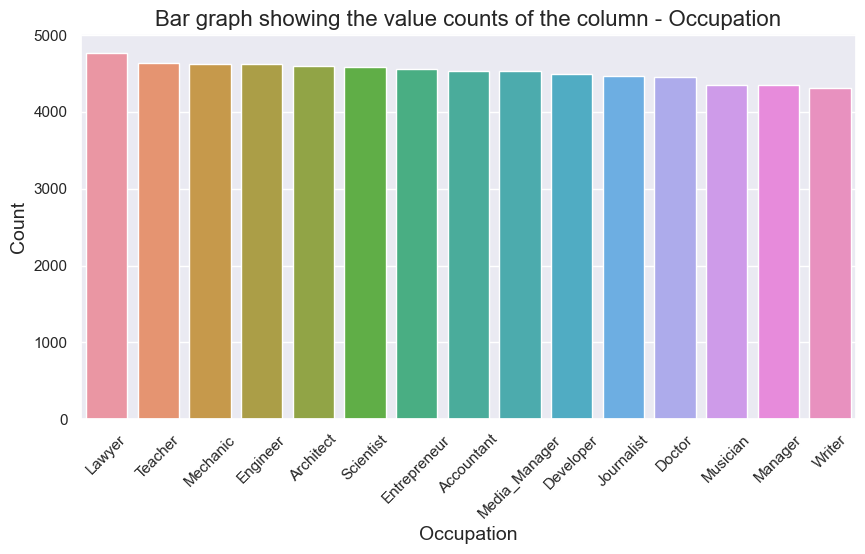

In [20]:
# using the new dataframe called "df"
#calaculte the value count of the variable "occupation"
Occupation = new_dataset['Occupation'].value_counts()

#set figure size
sns.set(rc={'figure.figsize': (10, 5)})
sns.barplot(x=Occupation.index, y=Occupation.values)
plt.title('Bar graph showing the value counts of the column - Occupation', fontsize=16)

#adding the x and y label
plt.ylabel('Count', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Annual_Income'>

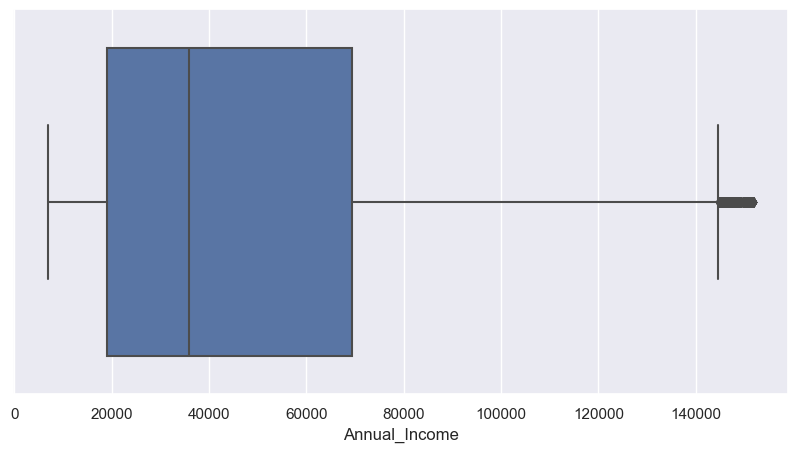

In [21]:
sns.boxplot(x=df['Annual_Income'])

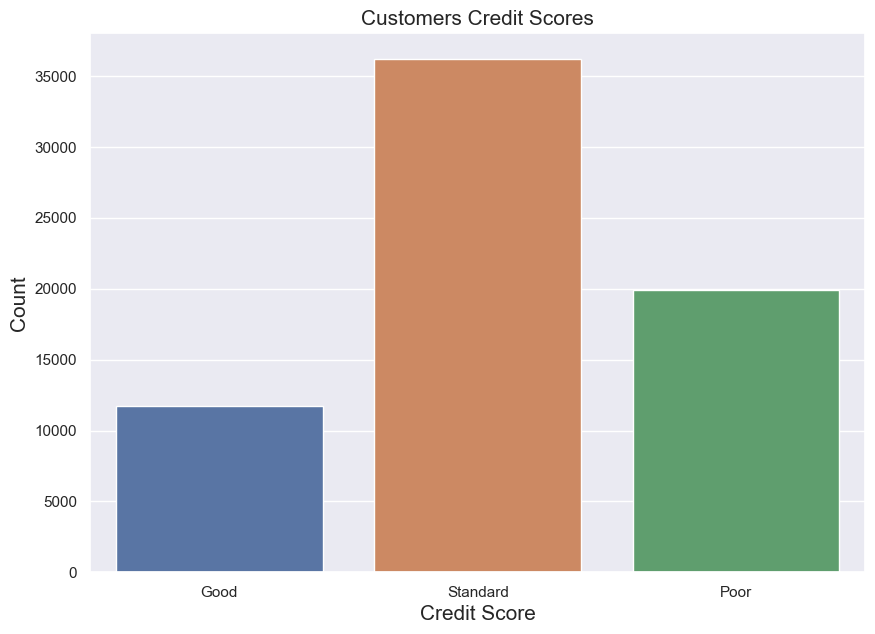

In [22]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x="Credit_Score")
plt.title("Customers Credit Scores", size =15, fontweight="normal")
plt.xlabel("Credit Score", size=15, fontweight="normal")
plt.ylabel("Count", size=15, fontweight="normal")
plt.show()


In [23]:
#label = df.Credit_Score.value_counts().index
#label_count = df.Credit_Score.value_counts().values
#plt.pie(data=df, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
#plt.show()

In [24]:
#def pie_plot(df, cols_list, rows, cols):
    #fig, axes = plt.subplots(rows, cols)
    #for ax, col in zip(axes.ravel(), cols_list):
    #    df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
    #    ax.set_title(str(col), fontsize = 12)
  #  plt.show()

<Axes: xlabel='Occupation', ylabel='count'>

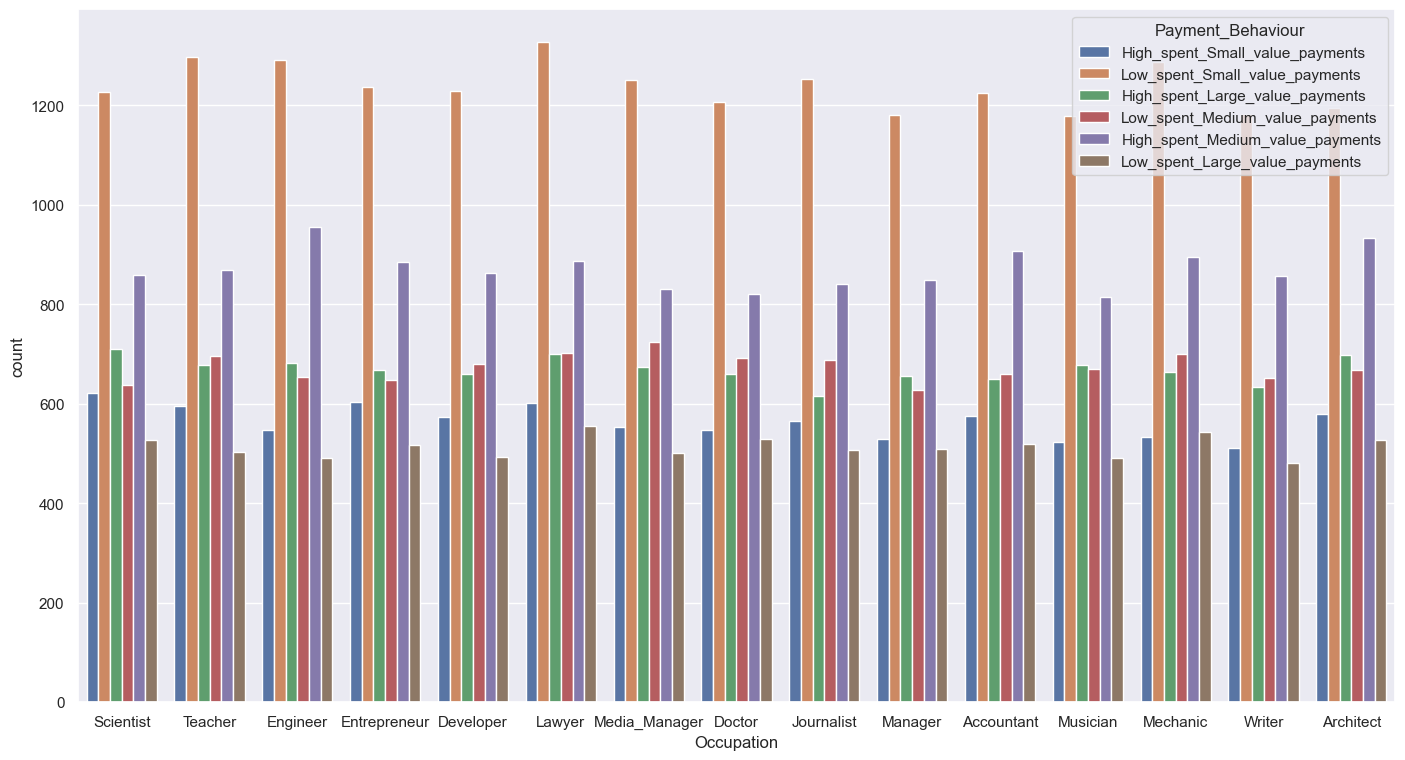

In [25]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df,x="Occupation",hue="Payment_Behaviour")

<Axes: xlabel='Occupation', ylabel='count'>

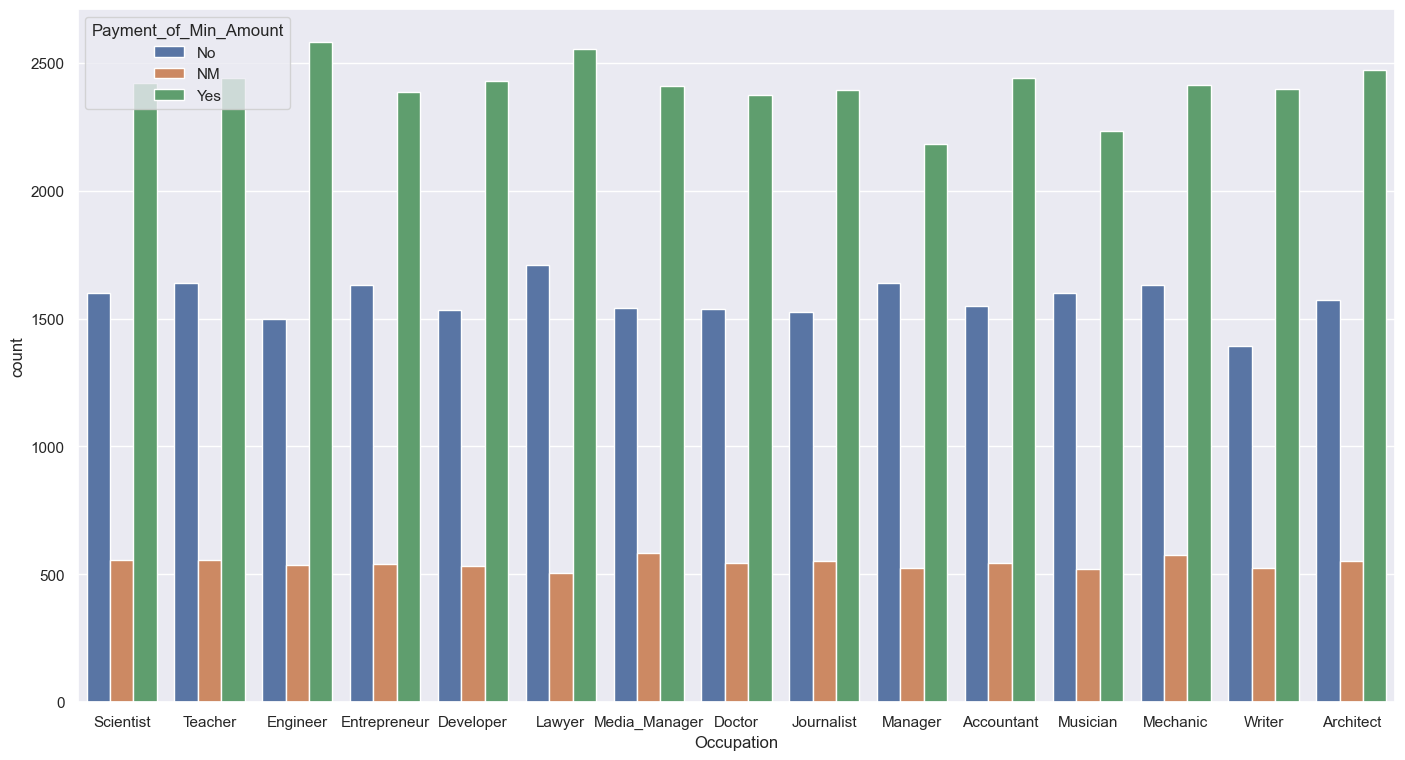

In [26]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df,x="Occupation",hue="Payment_of_Min_Amount")

In [27]:
import matplotlib.pyplot as plt

In [28]:
#pie_plot(df, ['Payment_of_Min_Amount', 'Payment_Behaviour',], 2,1)

In [29]:
#from plot_utils import pie_plot

In [30]:
#!pip install plot_utils

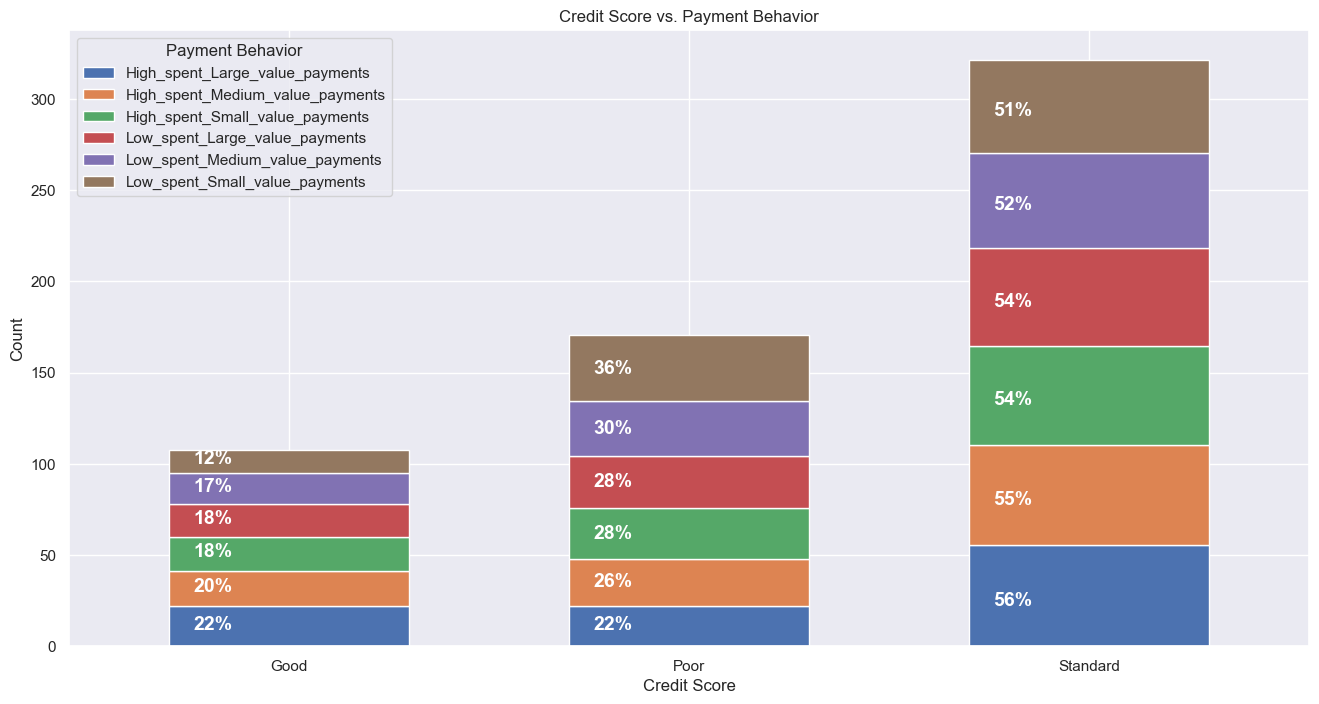

In [31]:
payment_distribution = new_dataset.groupby(['Credit_Score', 'Payment_Behaviour']).size().unstack(fill_value=0)

# Plot the stacked bar chart
graph = (payment_distribution * 100.0 / payment_distribution.sum()).plot(
    kind='bar',
    width=0.6,
    rot=0,
    stacked=True,
    figsize=(16, 8)
)

# Add annotations to the bars
graph.plot()
for bar in graph.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    graph.annotate(
        '{:.0f}%'.format(height),
        (bar.get_x() + 0.1 * width, bar.get_y() + 0.4 * height),
        color='white',
        weight='bold',
        size=14,
    )

# Customize the plot
plt.title('Credit Score vs. Payment Behavior')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Behavior')

plt.show()

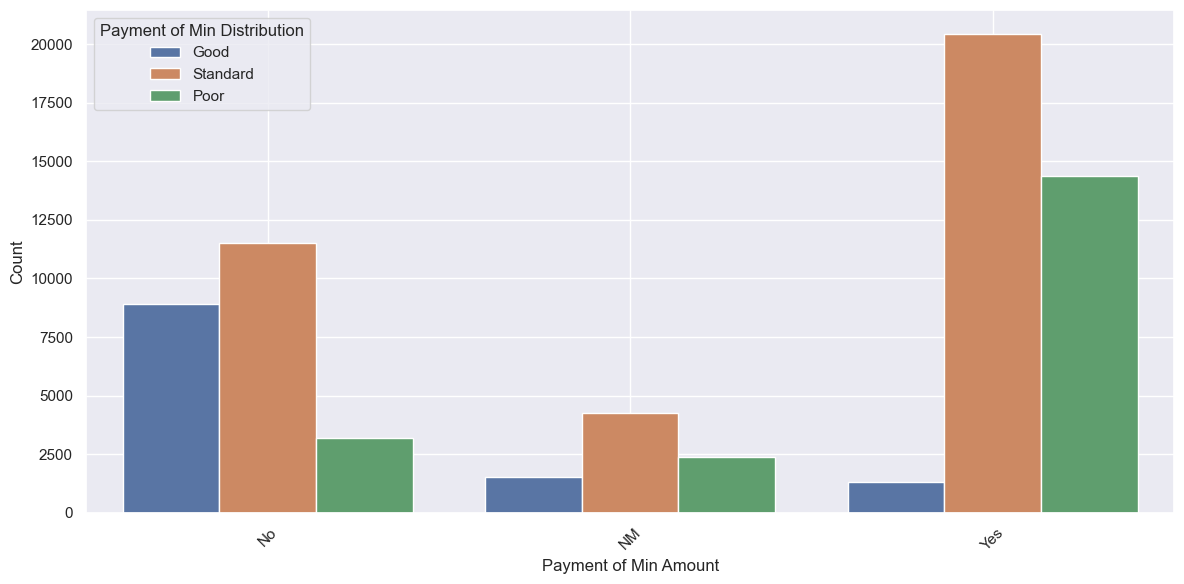

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(data=new_dataset, x='Payment_of_Min_Amount', hue='Credit_Score')
plt.xlabel('Payment of Min Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Payment of Min Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()

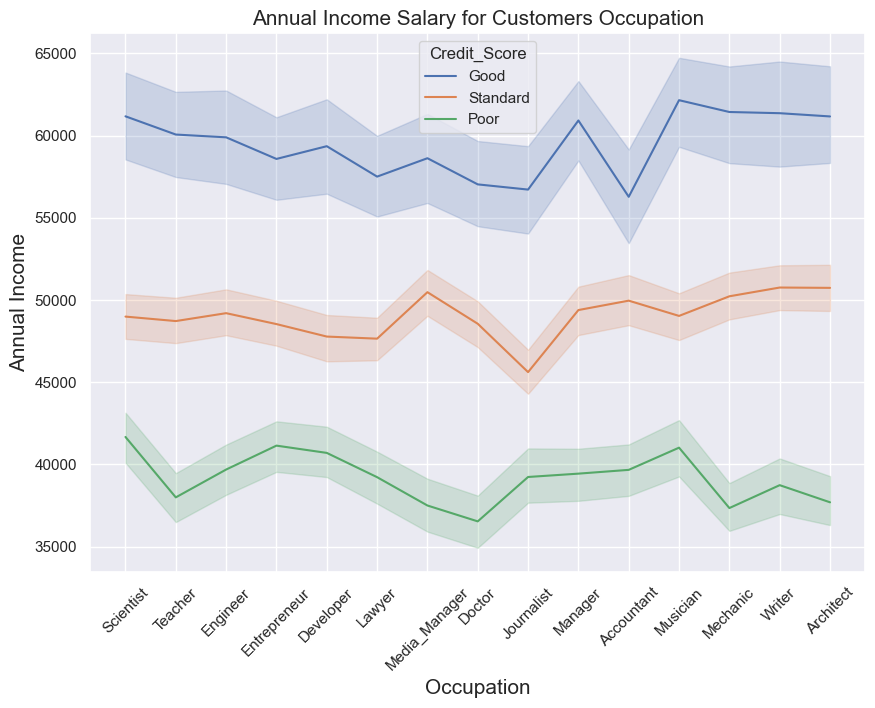

In [33]:
plt.figure(figsize=(10, 7))

# to create a line plot
sns.lineplot(data=new_dataset, x="Occupation", y="Annual_Income", hue="Credit_Score")
plt.xticks(rotation=45)
plt.title("Annual Income Salary for Customers Occupation", size=15, fontweight="normal")

#set x-axis label
plt.xlabel("Occupation", size=15, fontweight="normal")

#set y-axis label
plt.ylabel("Annual Income", size=15, fontweight="normal")
plt.show()

In [34]:
new_dataset.to_csv("Visualization Dataset.csv", index=False)

#### MODELLING

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [36]:
approved_dataset = new_dataset.copy()

In [37]:
le_Occupation = LabelEncoder()


approved_dataset['Occupation'] = le_Occupation.fit_transform(approved_dataset['Occupation']) 
approved_dataset['Occupation'].unique()

array([12, 13,  4,  5,  2,  7, 10,  3,  6,  8,  0, 11,  9, 14,  1])

In [38]:
# Encoding the 'Occupation' column
df['Encoded_Occupation'] = le_Occupation.fit_transform(df['Occupation'])

# Accessing and printing the mapping from labels to integers
occupation_mapping = dict(zip(le_Occupation.classes_, range(len(le_Occupation.classes_))))
print("\nMapping of Occupation labels to numbers:")
print(occupation_mapping)



Mapping of Occupation labels to numbers:
{'Accountant': 0, 'Architect': 1, 'Developer': 2, 'Doctor': 3, 'Engineer': 4, 'Entrepreneur': 5, 'Journalist': 6, 'Lawyer': 7, 'Manager': 8, 'Mechanic': 9, 'Media_Manager': 10, 'Musician': 11, 'Scientist': 12, 'Teacher': 13, 'Writer': 14}


In [39]:
le_Payment_Behaviour = LabelEncoder()

approved_dataset['Payment_Behaviour'] = le_Payment_Behaviour.fit_transform(approved_dataset['Payment_Behaviour'])
approved_dataset['Payment_Behaviour'].unique()

array([2, 5, 0, 4, 1, 3])

In [40]:
# Encoding the 'Occupation' column
df['Encoded_Payment_Behaviour'] = le_Payment_Behaviour.fit_transform(df['Payment_Behaviour'])

# Accessing and printing the mapping from labels to integers
Payment_Behaviour_mapping = dict(zip(le_Payment_Behaviour.classes_, range(len(le_Payment_Behaviour.classes_))))
print("\nMapping of Credit Score labels to numbers:")
print(Payment_Behaviour_mapping)


Mapping of Credit Score labels to numbers:
{'High_spent_Large_value_payments': 0, 'High_spent_Medium_value_payments': 1, 'High_spent_Small_value_payments': 2, 'Low_spent_Large_value_payments': 3, 'Low_spent_Medium_value_payments': 4, 'Low_spent_Small_value_payments': 5}


In [41]:
le_Credit_Score = LabelEncoder()

approved_dataset['Credit_Score'] = le_Credit_Score.fit_transform(approved_dataset['Credit_Score'])
approved_dataset['Credit_Score'].unique()

array([0, 2, 1])

In [42]:
# Encoding the 'Occupation' column
df['Encoded_Credit_Score'] = le_Credit_Score.fit_transform(df['Credit_Score'])

# Accessing and printing the mapping from labels to integers
occupation_mapping = dict(zip(le_Credit_Score.classes_, range(len(le_Credit_Score.classes_))))
print("\nMapping of Credit Score labels to numbers:")
print(occupation_mapping)


Mapping of Credit Score labels to numbers:
{'Good': 0, 'Poor': 1, 'Standard': 2}


In [43]:
le_Payment_of_Min_Amount = LabelEncoder()
approved_dataset['Payment_of_Min_Amount'] = le_Payment_of_Min_Amount.fit_transform(approved_dataset['Payment_of_Min_Amount'])
approved_dataset['Payment_of_Min_Amount'].unique()

array([1, 0, 2])

In [44]:
approved_dataset.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,12,19114.12,3,7,809.98,22.1,1,49.57494921489417,2,312.49408867943663,0
3,23,12,19114.12,5,4,809.98,22.4,1,49.57494921489417,5,223.45130972736786,0
6,23,12,19114.12,3,8,809.98,22.7,1,49.57494921489417,5,244.5653167062043,0
9,28,13,34847.84,7,1,605.03,26.8,1,18.816214573128885,0,484.5912142650067,0
10,28,13,34847.84,3,-1,605.03,26.9,1,18.816214573128885,0,466.46647639764313,2


In [45]:
approved_dataset.to_csv("Credit Score Dataset.csv", index=False)

#### TRAINING THE MODEL 

In [46]:
# We need to state the dependent and independent variable
X = approved_dataset.drop(['Credit_Score'], axis ='columns')
y = approved_dataset['Credit_Score']

In [47]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2022)

In [48]:
#we need to scaler the numerical features
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [49]:
print(X_train.shape)


(54304, 11)


In [50]:
# Importing further libraries
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,f1_score,confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import plotly.express as px

In [51]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (54304, 11)
Shape of X_test:  (13577, 11)


##### RANDOM FOREST

In [52]:
#using RANDOM FOREST
#lets train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
#predict the target variable
y_pred = rf_model.predict(X_test)

#to calculate the accuracy score
rf_accuracy = accuracy_score(y_test,y_pred)

# to calculate the F1 score
rf_f1 = f1_score(y_test, y_pred,average='weighted')

#print f1 score and accuracy score
print(f'F1 Score:{rf_f1}')
print(f'Accuracy:{rf_accuracy}')

F1 Score:0.7710279615067885
Accuracy:0.7719672976357075


In [61]:
#for Confusion matrix
cm_RT = confusion_matrix(y_test, y_pred)
cm_RT

array([[1505,   28,  789],
       [  60, 3171,  825],
       [ 530,  864, 5805]])

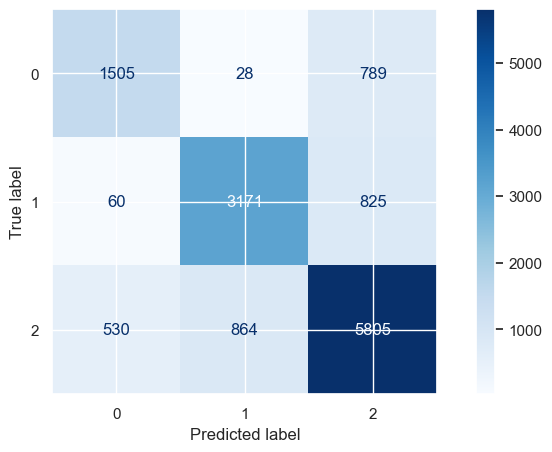

In [65]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

unique_classes = sorted(set(y_test))

# Plot the confusion matrix
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_RT, display_labels=unique_classes)
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.show()

In [66]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68      2095
           1       0.78      0.78      0.78      4063
           2       0.81      0.78      0.79      7419

    accuracy                           0.77     13577
   macro avg       0.75      0.76      0.75     13577
weighted avg       0.77      0.77      0.77     13577



##### USING DECISION TREE

In [67]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(X_train, y_train)

dt_y_pred = dtree.predict(X_test)


dT_accuracy = accuracy_score(y_test,dt_y_pred)


dT_f1 = f1_score(y_test, dt_y_pred,average='weighted')

#print f1 score and accuracy score

print(f'F1 Score:{dT_f1}')
print("Accuracy=",dT_accuracy)


F1 Score:0.6881160073485911
Accuracy= 0.6880017676953671


In [68]:
#for Confusion matrix
cm_DT = confusion_matrix(y_test, dt_y_pred)
cm_DT

array([[1357,   99,  866],
       [ 106, 2842, 1108],
       [ 869, 1188, 5142]])

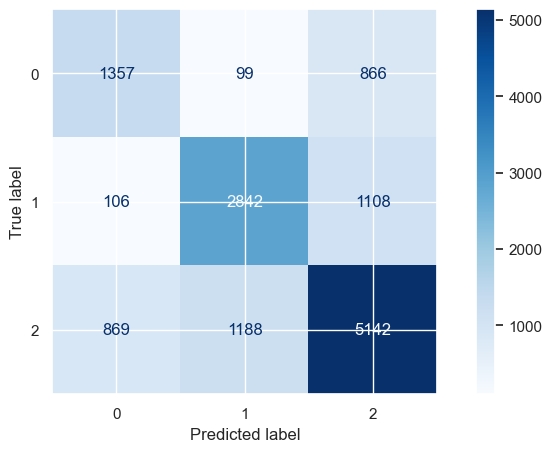

In [72]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

unique_classes = sorted(set(y_test))

# Plot the confusion matrix
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=unique_classes)
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.show()

In [73]:
print(classification_report(dt_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58      2332
           1       0.70      0.69      0.69      4129
           2       0.71      0.72      0.72      7116

    accuracy                           0.69     13577
   macro avg       0.67      0.66      0.67     13577
weighted avg       0.69      0.69      0.69     13577



#### KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)


KNeighborsClassifier()

In [75]:
kn_y_pred = kn.predict(X_test)
kn_cm = confusion_matrix(y_test,kn_y_pred)

Knn_f1 = f1_score(y_test, kn_y_pred,average='weighted')
kn_accuracy = accuracy_score(y_test,kn_y_pred)


print(f'F1 Score:{Knn_f1}')
print("Accuracy=",kn_accuracy)

F1 Score:0.6863708900349985
Accuracy= 0.6877071518008396


In [76]:
#for Confusion matrix
cm_KN = confusion_matrix(y_test, kn_y_pred)
cm_KN

array([[1148,  116, 1058],
       [ 198, 2874,  984],
       [ 808, 1076, 5315]])

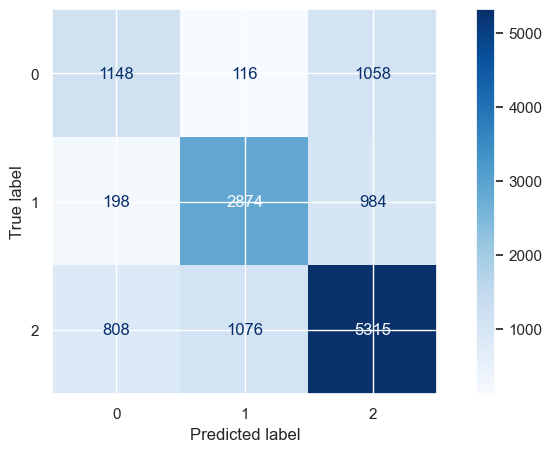

In [78]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

unique_classes = sorted(set(y_test))

# Plot the confusion matrix
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_KN, display_labels=unique_classes)
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.show()

In [77]:
print(classification_report(kn_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.49      0.53      0.51      2154
           1       0.71      0.71      0.71      4066
           2       0.74      0.72      0.73      7357

    accuracy                           0.69     13577
   macro avg       0.65      0.65      0.65     13577
weighted avg       0.69      0.69      0.69     13577



In [79]:
Accuracy=[rf_accuracy*100,dT_accuracy*100,kn_accuracy*100]
Algorithm=['Random forest', 'Decision Tree','KNN']
f1_score=[rf_f1*100, dT_f1*100,Knn_f1*100,]
data={'Algorithm':Algorithm,'Accuracy':Accuracy,'F1_SCORE':f1_score}
Report=pd.DataFrame(data=data)
Report

,Algorithm,Accuracy,F1_SCORE
0,Random forest,77.196730,77.102796
1,Decision Tree,68.800177,68.811601
2,KNN,68.770715,68.637089


#### STREAMLIT APP

In [80]:
X

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,23,12,19114.12,3,7,809.98,22.1,1,49.57494921489417,2,312.49408867943663
3,23,12,19114.12,5,4,809.98,22.4,1,49.57494921489417,5,223.45130972736786
6,23,12,19114.12,3,8,809.98,22.7,1,49.57494921489417,5,244.5653167062043
9,28,13,34847.84,7,1,605.03,26.8,1,18.816214573128885,0,484.5912142650067
10,28,13,34847.84,3,-1,605.03,26.9,1,18.816214573128885,0,466.46647639764313
...,...,...,...,...,...,...,...,...,...,...,...
99991,29,1,20002.88,33,25,3571.7,6.3,2,60.964772373422434,0,337.3629882027182
99994,25,9,39628.99,20,6,502.38,31.5,1,35.10402261040746,1,410.2561579776419
99995,25,9,39628.99,23,7,502.38,31.6,1,35.10402261040746,0,479.86622816574095
99996,25,9,39628.99,18,7,502.38,31.7,1,35.10402261040746,1,496.651610435322


In [81]:
X = np.array([[54,"Entrepreneur" , 30689.89, 33, 25, 3571.98, 22.1, "No", 49.474,"Low_spent_Large_value_payments", 433.604]])
X

array([['54', 'Entrepreneur', '30689.89', '33', '25', '3571.98', '22.1',
        'No', '49.474', 'Low_spent_Large_value_payments', '433.604']],
      dtype='<U32')

In [82]:
X[:,1] = le_Occupation.transform(X[:,1])
X[:,7] = le_Payment_of_Min_Amount.transform(X[:,7])
X[:,9] = le_Payment_Behaviour.transform(X[:,9])

X = X.astype(float)
X

array([[5.400000e+01, 5.000000e+00, 3.068989e+04, 3.300000e+01,
        2.500000e+01, 3.571980e+03, 2.210000e+01, 1.000000e+00,
        4.947400e+01, 3.000000e+00, 4.336040e+02]])

In [83]:
y_pred = rf_model.predict(X)
y_pred

array([2])

In [84]:
import pickle

data = {
    "model": rf_model, 
    "le_Occupation": le_Occupation, 
    "le_Payment_of_Min_Amount": le_Payment_of_Min_Amount,
    "le_Payment_Behaviour": le_Payment_Behaviour
}

# Saving the dictionary to a pickle file
with open("save_good_model.pkl", "wb") as file:  # Note 'wb' for writing in binary mode
    pickle.dump(data, file)


In [ ]:
joblib.dump(le_Occupation, 'occupation_encoder.pkl')
joblib.dump(le_Payment_of_Min_Amount, 'payment_min_amount_encoder.pkl')
joblib.dump(le_Payment_Behaviour, 'payment_behaviour_encoder.pkl')

In [ ]:
joblib.dump(le_Occupation, 'occupation_encoder.pkl')


In [ ]:
joblib.dump(le_Payment_of_Min_Amount, 'payment_min_amount_encoder.pkl')

In [ ]:
import pickle
import os

In [ ]:
with open('model_pickle', 'wb')as f:
    pickle.dump(rf_model, f)

In [ ]:
# to read the model in to try to predict
#with open('model_pickle', 'rb')as f:
    #model_1 = pickle.load(f)


In [ ]:
import joblib

In [85]:
file_path = "Rf_model.pkl"
with open(file_path, 'wb') as f:
    pickle.dump(rf_model, f)

In [ ]:
import os

In [ ]:
if os.path.exists(file_path):
    with open(file_path, "rb") as f:
        